# Part2 - Nonlinear Models
## Goal:
1. Compare the nonlinear models including:
* Decision Tree Regressor
* Random Forest
* XGBoost
* Neural Network (if we have time)

* What more you should know but we will not cover today:
> LightGBM
> TensorFlow Decision Forests: TensorFlow Decision Forests
2. Hyperparameter Tuning
3. Load all models and conduct feature importance analysis
* permutation importance [Link](https://scikit-learn.org/stable/modules/permutation_importance.html)
* SHAP package [Link](https://shap.readthedocs.io/en/latest/) (if we have time)

### Readings to review:
1. Intro to decision tree [Link] (https://medium.com/@MrBam44/decision-trees-91f61a42c724#:~:text=A%20decision%20tree%20is%20a,Bagging%2C%20and%20Boosted%20Decision%20Trees.)

# Introduction to Decision Tree (in 5 seconds)
<p align="center">
<img src="../asset/decision_tree.PNG" alt="decision_tree" style="width:50%; border:0;">
</p>

* Root Nodes — It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.
* Decision Nodes — the nodes we get after splitting the root nodes are called Decision Node
* Leaf Nodes — the nodes where further splitting is not possible are called leaf nodes or terminal nodes
* Branch/Sub-tree — a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.
* Pruning — cutting down some nodes to stop overfitting.
* [Source](https://medium.com/@MrBam44/decision-trees-91f61a42c724#:~:text=A%20decision%20tree%20is%20aBagging%2C%20and%20Boosted%20Decision%20Trees)

# Tutorials

### 1. Data Preprocessing
* Here we simply repeat the previosu steps

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [14]:
# Visualisation Style Configuration 
palette = ['#009688', '#ff5722','#795548','#3f51b5','#673ab7','#2196f3','#8bc34a','#9e9e9e', '#8ac52a', '#643e67']
alpha = 0.5
_theme = sns.set_theme(style="whitegrid", font="sans-serif",palette=palette[0:2], font_scale=0.100, rc={'grid.color': '#d4d5d6', 'grid.linewidth': 0.25})
_fig = plt.figure(figsize=(15,7))
_context = sns.set_context('paper', font_scale=1.4)
sns.set(rc={"figure.dpi":75, 'savefig.dpi':75})

<Figure size 1500x700 with 0 Axes>

In [13]:
# !pip install xgboost
# !pip install lightgbm

In [9]:
# load the previous processed data.
df_train = pd.read_csv('./data/train_clean_advanced.csv', index_col='Id')
df_train.head()

,LotFrontage,LotArea,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,YearRemodAgg,TotalPorchSF,IsNew,AreaCondition,TotalSFCondition,GarageAreaCondition,TotalBsmntSFCondition,AreaQuality,TotalSFQuality,GarageAreaQuality,TotalBsmntSFQuality,AreaPerBedroom,TotalSFPerBedroom,MSSubClass_Other,MSSubClass_SC120,MSSubClass_SC160,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC80,MSSubClass_SC90,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Other,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Other,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_Other,Utilities_AllPub,Utilities_Other,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition2_Norm,Condition2_Other,BldgType_1Fam,BldgType_Duplex,BldgType_Other,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,RoofMatl_CompShg,RoofMatl_Other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Other,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,Heating_GasA,Heating_Other,Electrical_FuseA,Electrical_Other,Electrical_SBrkr,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Other,MiscFeature_None,MiscFeature_Other,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.413268,0.366271,0.0,1.0,1.0,0.666667,0.500,0.949275,0.883333,0.12250,0.5,0.333333,0.666667,0.5,0.333333,1.000000,0.322669,0.333333,0.0,0.064212,0.266999,1.000000,1.0,0.180373,0.469747,0.0,0.684506,0.333333,0.0,0.666667,0.5,0.285714,0.333333,0.5,0.500000,0.000000,0.000000,0.996517,0.666667,0.50,0.394245,0.333333,0.333333,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,12.247699,0.366262,0.5,0.883333,0.595085,1.0,0.393912,0.270881,0.197691,0.193054,0.432802,0.319140,0.197691,0.184443,0.166834,0.137625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.490307,0.391245,0.0,1.0,0.5,0.555556,0.875,0.753623,0.433333,0.00000,0.0,0.333333,0.666667,0.5,1.000000,0.666667,0.446984,0.333333,0.0,0.121575,0.393637,1.000000,1.0,0.320663,0.000000,0.0,0.557071,0.000000,0.5,0.666

## 2. Hyperparameter Tuning
#### Grid Search Cross Validation
To find the best hyperparameters for our models, we will use grid search cross-validation. Grid search cross-validation will help us find the best combination of hyperparameters for our models by evaluating all possible combinations of hyperparameters in the grid. We will use RandomizedSearchCV to find the best hyperparameters for our models, as it is more efficient and scales better to large number of features than GridSearchCV.

In [10]:
# we split the data here again
non_feature = ['SalePrice']
X = df_train.drop(columns=non_feature)
y = df_train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111) 

In [11]:
# define algorithms and parameters to be used for the girdsearch
random_state = 0
algorithms = [
    GradientBoostingRegressor(random_state=0),
    XGBRegressor(random_state=0),
    RandomForestRegressor(random_state=0)]

param_grid = [
    # parameters for GradientBoostingRegressor
    {'learning_rate': [0.05, 0.1, 0.15, 0.2],
     'min_samples_split': [3, 7, 11], 
     'min_samples_leaf': [2, 4, 6],
     'max_depth': [2, 5, 8],
     'n_estimators': [200, 250, 300],
     'max_features': ['sqrt', 'log2']},
    
    
    # parameters for XGBRegressor
    {'learning_rate': [ 0.025, 0.05, 0.075],
     'max_depth': [8, 9, 10],
     'min_child_weight': [4, 5, 6],
     'n_estimators': [200, 225, 250],
     'subsample': [0.45, 0.5, 0.55],
     'colsample_bytree': [0.25, 0.55, 0.75],
     'gamma': [0, 0.1, 0.25]},
    
    # parameters for RandomforestRegressor
    {'n_estimators': [100, 150, 200],
     'max_depth': [8, 9, 10],
     'min_samples_split': [3, 7, 11],
     'min_samples_leaf': [2, 4, 6],
     'max_features': ['sqrt', 'log2'],
     'bootstrap': [True, False]},
    
]

In [12]:
# Perform random search to find the best parameters for each algorithm using RandomizedSearchCV

best_params = []
for i, algo in tqdm(enumerate(algorithms)):
    start = time.time()
    rand_search = RandomizedSearchCV(algo, param_grid[i],
                                     n_iter=100,
                                     cv=10, n_jobs=-1, random_state=0)
    rand_search.fit(X_train, y_train)
    best_params.append(rand_search.best_params_)
    end = time.time()
    print(f"{algo.__class__.__name__} Time taken to fit: {round(((end - start) / 60),2)} minutes | Best parameters: {rand_search.best_params_}")
    
# Update the pipeline with the best parameters for each algorithm
for i, algo in enumerate(algorithms):
    algo.set_params(**best_params[i])

# Fit the final pipeline with the best parameters
for algo in algorithms:
    algo.fit(X_train, y_train)

1it [00:31, 31.10s/it]

GradientBoostingRegressor Time taken to fit: 0.52 minutes | Best parameters: {'n_estimators': 250, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}


2it [01:08, 34.95s/it]

XGBRegressor Time taken to fit: 0.63 minutes | Best parameters: {'subsample': 0.45, 'n_estimators': 225, 'min_child_weight': 6, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.55}


3it [01:39, 33.04s/it]

RandomForestRegressor Time taken to fit: 0.51 minutes | Best parameters: {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


### Visualize the prediction and actual results after the parameter tuning

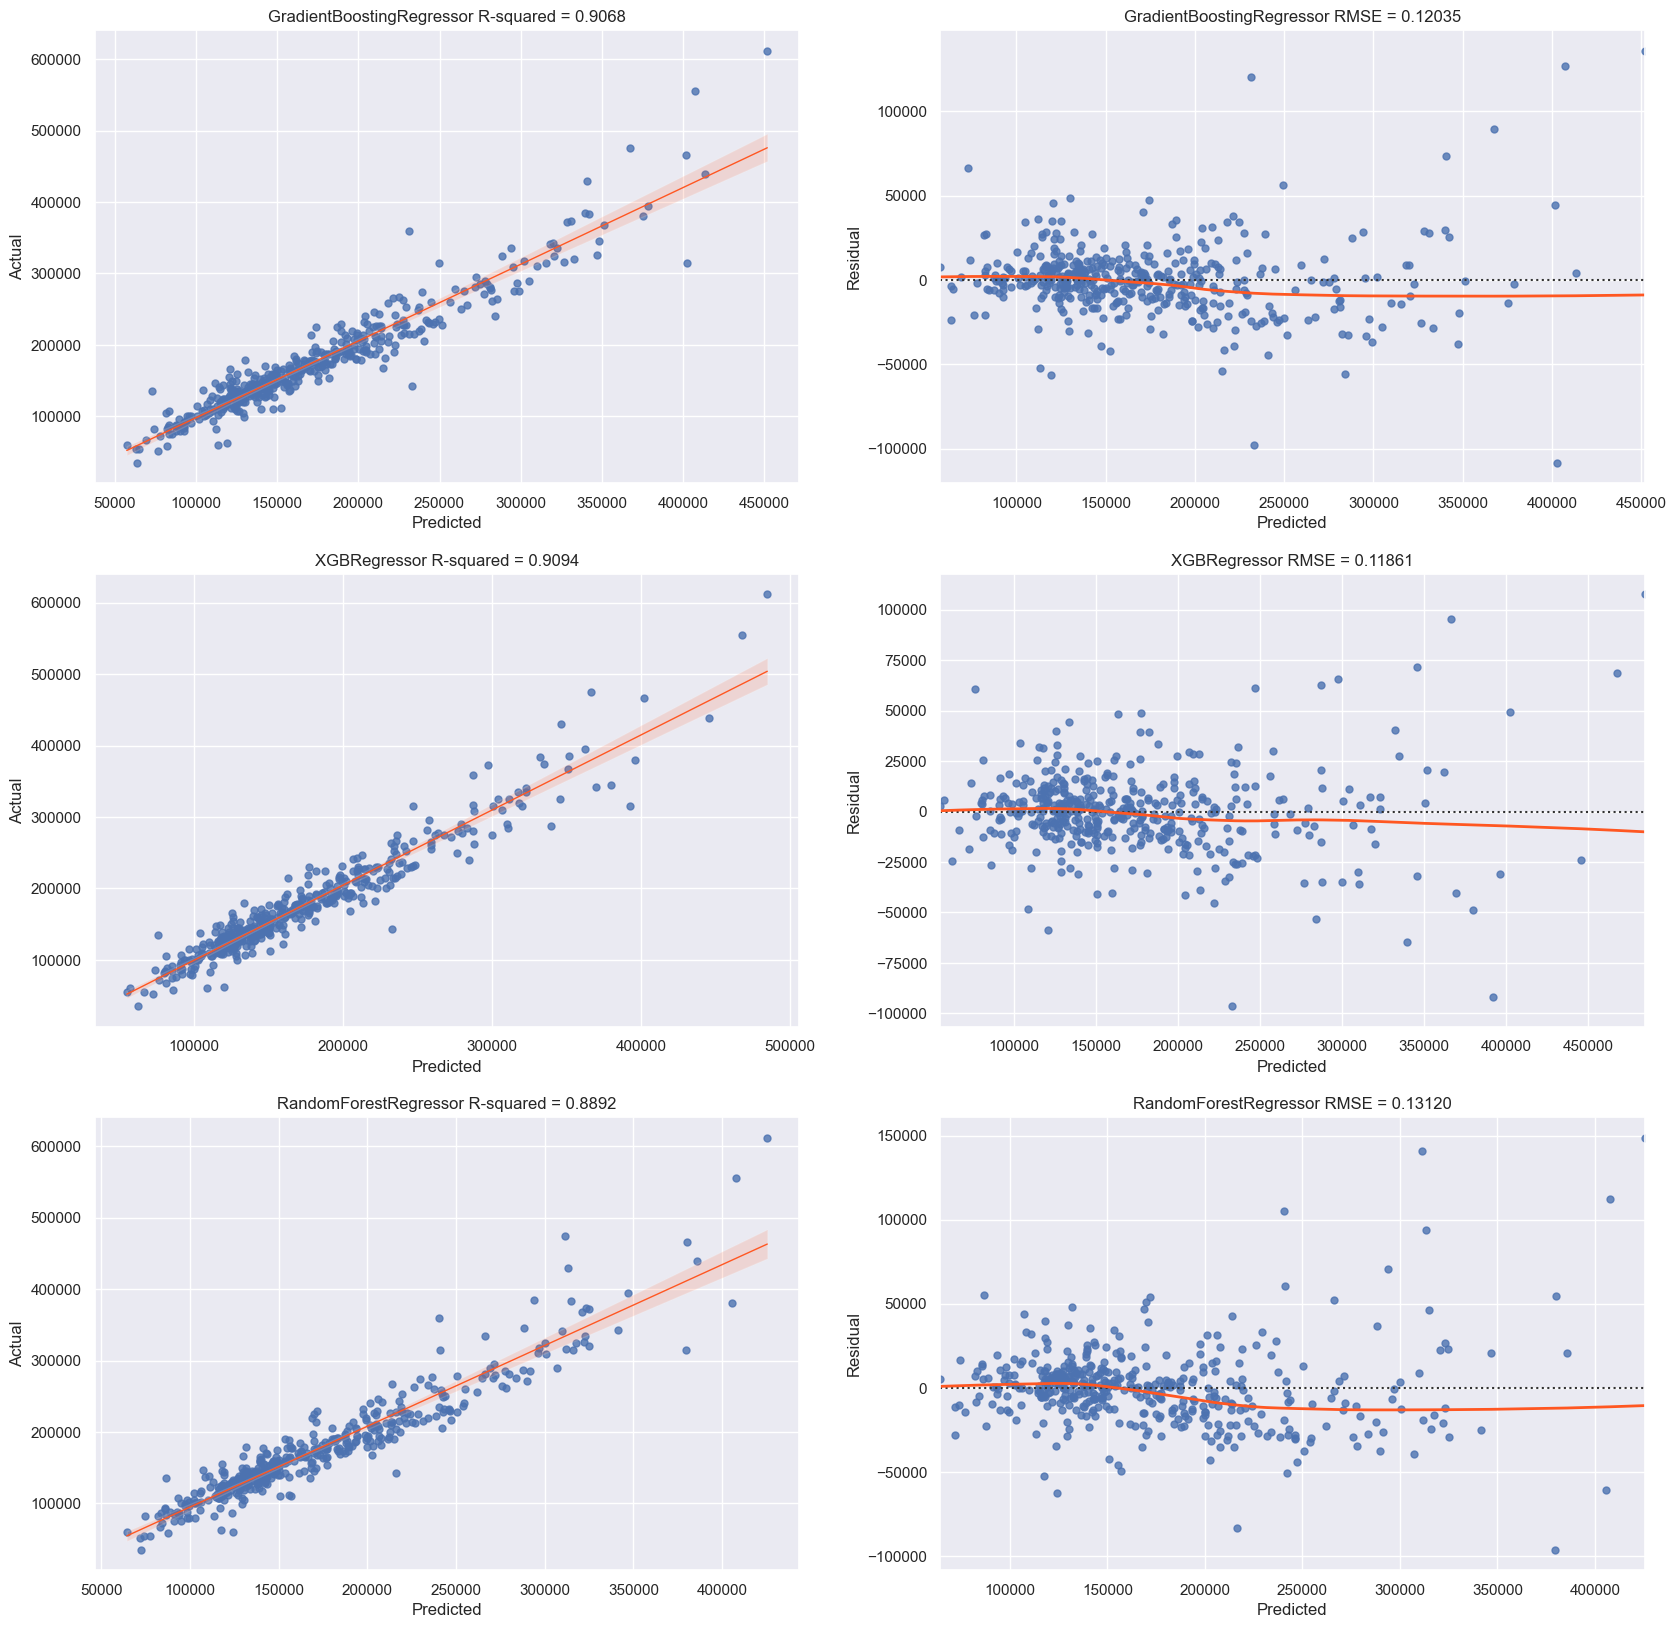

In [18]:
# Visualize the models with the best parameters chosen

fig, ax = plt.subplots(3, 2, figsize=(20, 20), dpi=100)

for i, algo in enumerate(algorithms):
    algo.fit(X_train, y_train)
    X_test_predictions = algo.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2 = r2_score(y_test, X_test_predictions)
    rmse = mean_squared_error((y_test), (X_test_predictions), squared=False)
    
    # Plot the scatter plot on the first subplot
    sns.regplot(x=np.exp(X_test_predictions), y=np.exp(y_test), scatter_kws={'s':25}, line_kws={'color': palette[1], 'lw':1}, ax=ax[i, 0])
    ax[i, 0].set_title(f"{algo.__class__.__name__} R-squared = {r2:.4f}")
    ax[i, 0].set_xlabel("Predicted")
    ax[i, 0].set_ylabel("Actual")
    
    # Plot the residual plot on the second subplot
    sns.residplot(x=np.exp(X_test_predictions), y=np.exp(y_test), lowess=True, scatter_kws={'s':25}, line_kws={'color':palette[1],'lw':2}, ax=ax[i, 1])
    ax[i, 1].set_title(f"{algo.__class__.__name__} RMSE = {rmse:.05f}")
    ax[i, 1].set_xlabel("Predicted")
    ax[i, 1].set_ylabel("Residual")
    
plt.show()

## 3. Compare the feature importance